# Task 1: SPAM SMS DETECTION

>Import the necessary packges

In [60]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Load the data

In [61]:
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Exploring the dataset

In [62]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [63]:
columns_remove = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
data = data.drop(columns_remove,axis =1 )
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [64]:
data[data.duplicated()]
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [65]:
values = data['v1'].value_counts()
values

v1
ham     4825
spam     747
Name: count, dtype: int64

# Data Visualization

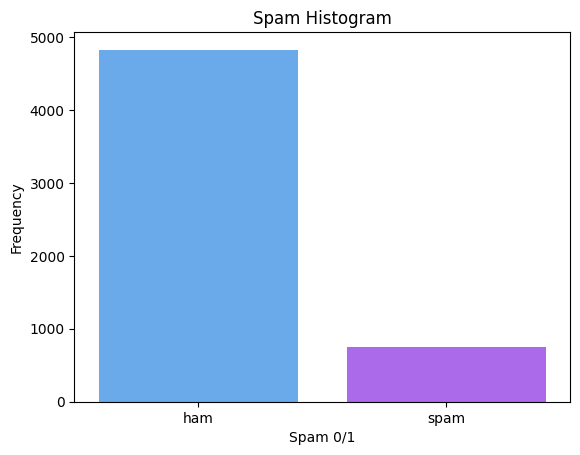

In [66]:
colors = ['blue','red']
sns.countplot(x='v1',data = data,palette= 'cool')
plt.xlabel('Spam 0/1')
plt.ylabel('Frequency')
plt.title('Spam Histogram')
plt.show()

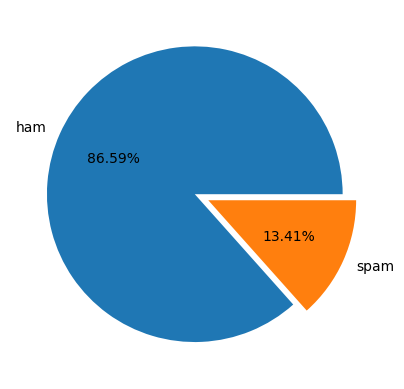

In [68]:
plt.pie(values, labels=data.v1.unique(),autopct='%1.2f%%',explode = (0,0.1))
plt.show()

# Data Preprocessing

In [69]:
data.loc[data['v1'] == 'spam', 'v1'] = 1
data.loc[data['v1'] == 'ham', 'v1'] = 0
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [70]:
data.rename(columns= {'v1':'target','v2' : 'Text'},inplace= True)
data.sample(10)

,target,Text
989,0,Ugh. Gotta drive back to sd from la. My butt i...
2608,0,Hello madam how are you ?
2909,0,How do you guys go to see movies on your side.
4893,0,Convey my regards to him
2808,0,Oh yeah I forgot. U can only take 2 out shoppi...
3408,0,Whats that coming over the hill..... Is it a m...
867,1,PRIVATE! Your 2003 Account Statement for 07808...
392,0,Morning only i can ok.
2306,0,"Aight that'll work, thanks"
865,1,Congratulations ur awarded either a yrs supply...


In [71]:
X_train,y_train=data['Text'],data['target']

# Feature Extraction

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
feat = TfidfVectorizer()
X_train = feat.fit_transform(X_train)

In [74]:
y_train=y_train.astype(int)

# Model Training

In [75]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

# Model Evaluation

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
yhat = model.predict(X_train)
accuracy = accuracy_score(y_train, yhat)

print(f'The accuracy on x_train = {accuracy*100 :0.1f}%')

The accuracy on x_train = 97.7%
